<a href="https://colab.research.google.com/github/Kiruthigajayasanker/identifying-patterns-and-trends-in-campus-placement-data-using-meachine-learning/blob/main/Copy_of_campus_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score




In [124]:
df=pd.read_csv(r"/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [126]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

<ipython-input-127-b45153aef536>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


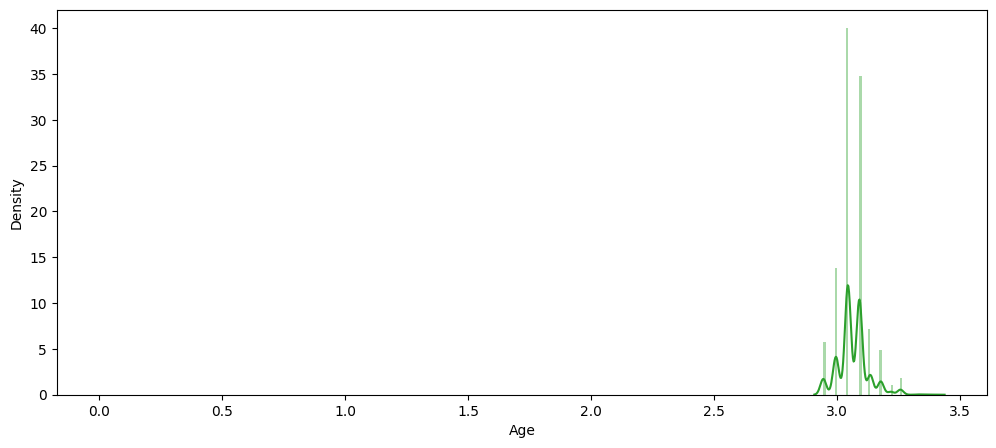

In [127]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.plot(1,2,1)
  sns.distplot(feature)
transformationplot(np.log(df['Age']))
  

In [128]:
df=df.replace(['Male'],[0])
df=df.replace(['Female'],[1])

df=df.replace(['Computer Science'],[0])
df=df.replace(['Information Technology'],[1])
df=df.replace(['Electronics And Communication'],[2])
df=df.replace(['Mechanical'],[3])
df=df.replace(['Electrical'],[4])
df=df.replace(['Civil'],[5])
df=df.drop(['Hostel'],axis=1)
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


<ipython-input-130-a1ea1fd3e2a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

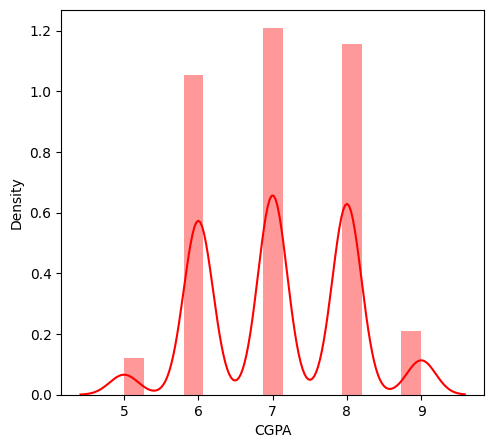

In [130]:

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

  

<ipython-input-104-5e468beb8a0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

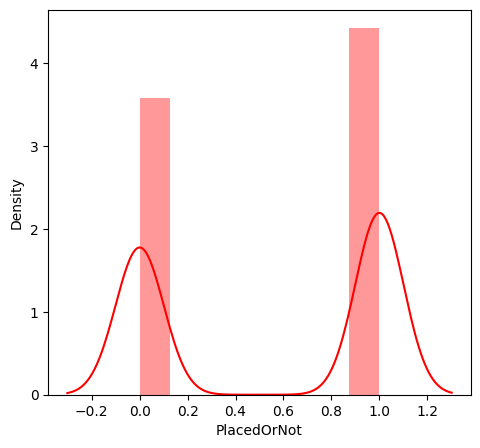

In [104]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')


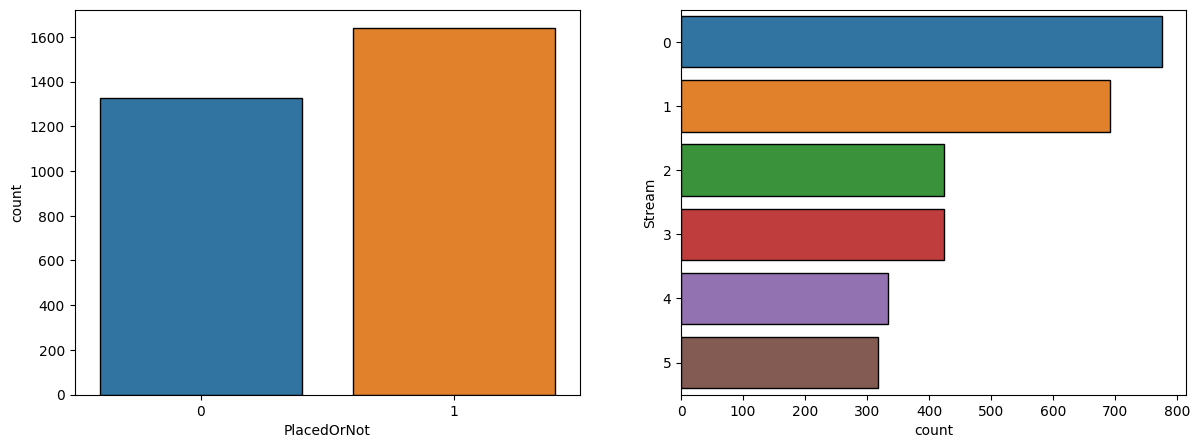

In [133]:
from matplotlib.offsetbox import martist
plt.figure(figsize=(30,5))
plt.subplot(1,4,1)
sns.countplot(x="PlacedOrNot",data=df,ec='black')
plt.subplot(1,4,2)
sns.countplot(y="Stream",data=df,ec='black')
plt.show()

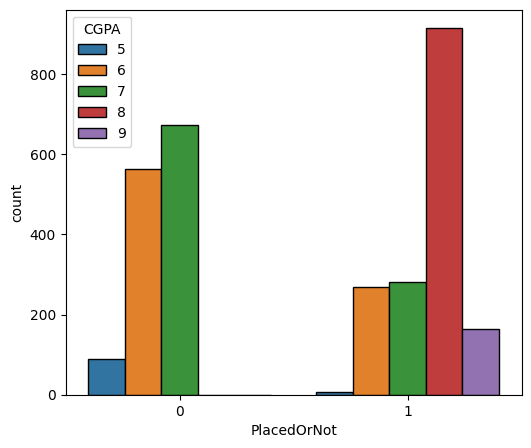

In [132]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x='PlacedOrNot', data=df, hue='CGPA',ec='black')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


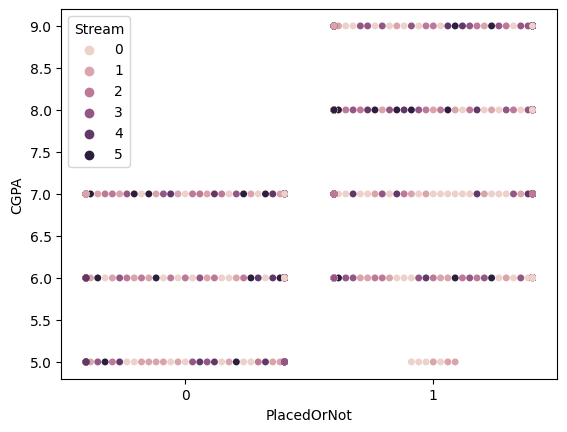

In [134]:
sns.swarmplot(data=df,x='PlacedOrNot',y='CGPA',hue='Stream')

In [120]:
df.describe()

,Age,Gender,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.165543,0.703641,7.073837,0.192178,0.552596
std,1.324933,0.371732,0.740197,0.967748,0.394079,0.497310
min,19.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,21.000000,0.000000,1.000000,7.000000,0.000000,1.000000
75%,22.000000,0.000000,1.000000,8.000000,0.000000,1.000000
max,30.000000,1.000000,3.000000,9.000000,1.000000,1.000000


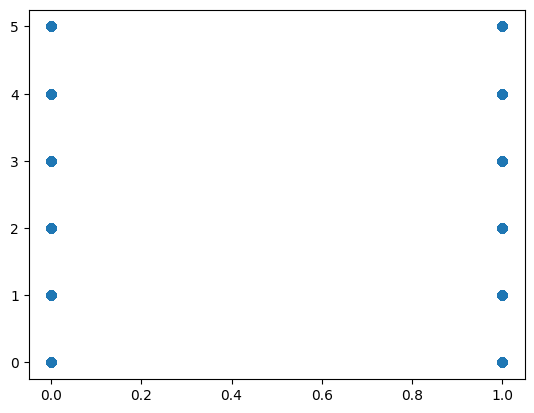

In [135]:
plt.scatter(df['PlacedOrNot'],df['Stream'])

In [136]:
x=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']
x

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,0,2,1,8,1
1,21,1,0,0,7,1
2,22,1,1,1,6,0
3,21,0,1,0,8,1
4,22,0,3,0,8,0
...,...,...,...,...,...,...
2961,23,0,1,0,7,0
2962,23,0,3,1,7,0
2963,22,0,1,1,7,0
2964,22,0,0,1,7,0


In [137]:
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [138]:
x=df.drop('PlacedOrNot',axis=1)
y=df['PlacedOrNot']
x


,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,0,2,1,8,1
1,21,1,0,0,7,1
2,22,1,1,1,6,0
3,21,0,1,0,8,1
4,22,0,3,0,8,0
...,...,...,...,...,...,...
2961,23,0,1,0,7,0
2962,23,0,3,1,7,0
2963,22,0,1,1,7,0
2964,22,0,0,1,7,0


In [139]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [141]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.11, stratify=y, random_state=42)

In [142]:
print(x_train.shape)
print(y_test.shape)


(2639, 6)
(327,)


In [ ]:
SVM MODEL

In [143]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
SVC()

SVC()

In [144]:
from sklearn import svm
classifier=svm.SVC()
classifier.fit(x_train,y_train)
SVC()
x_train_predicition=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predicition,y_train)
print('Accuracy score of the trainig data:',training_data_accuracy)


Accuracy score of the trainig data: 0.764304660856385


In [ ]:
KNN MODEL

In [145]:
best_k={"Regular":0}
best_score={"Regular":0}
for k in range(3,50,2):
  knn_temp=KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train,y_train)
  knn_temp_pred=knn_temp.predict(x_test)
  score=metrics.accuracy_score(y_test,knn_temp_pred)*100
  if score>=best_score["Regular"]and score<100:
    best_score["Regular"]=score
    best_k["Regular"]=k



In [146]:
print("--------Result----\nk:{}".format(best_score))
knn=KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testd=accuracy_score(knn_pred,y_test)

--------Result----
k:{'Regular': 88.37920489296636}


In [ ]:
ANN

In [148]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [155]:
classifier=Sequential()
#add input layer and first hidden layer
classifier.add(keras.layers.Dense(6,activation='relu',input_dim=6))
classifier.add(keras.layers.Dropout(0.50)) 
#add second hidden layer
classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0,50))
#final or output layer
classifier.add(keras.layers.Dense(1,activation='sigmoid'))

In [156]:
#compiling the model
loss_1=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1,metrics=['accuracy'])


In [157]:
#fitting the model
classifier.fit(x_train,y_train,batch_size=20,epochs=100)

Epoch 1/100
132/132 [==============================] - 2s 2ms/step - loss: 1.9228 - accuracy: 0.5051
Epoch 2/100
132/132 [==============================] - 0s 2ms/step - loss: 0.7798 - accuracy: 0.4987
Epoch 3/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5066
Epoch 4/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5290
Epoch 5/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6836 - accuracy: 0.5271
Epoch 6/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5123
Epoch 7/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5222
Epoch 8/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5146
Epoch 9/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5157
Epoch 10/100
132/132 [==============================] - 0s 2ms/step - loss: 0.6825 - accura

In [ ]:
Model Deployment

In [158]:
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model=pickle.load(open('placement.pkl','rb'))